# Paket Prabayar Manakah yang Lebih Baik?


Pada tahun 2018, Megaline menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Untuk menjawab pertanyaan ini maka akan dilakukan :

 1. Memeriksa dan memperbaiki data yang diberikan.
 2. Menambah informasi pada tiap data agar lebih mudah dianalisa.
 3. Mempelajari syarat dan ketentuan tiap paket dan informasi yang didapat dari data.
 4. Mengagregasikan data ke dalam satu dataframe untuk mempermudah analisa.
 5. Mempelajari perilaku pengguna di kedua paket.
 6. Menguji hipotesis statistik atas pertanyaan yang diajukan :
 
    a. Apakah pendapatan rata-rata dari pengguna paket ultimate dan surf berbeda ?
    
    b. Apakah pendapatan rata-rata pengguna wilayah NY-NJ-PA berbeda ?



 7. Menjawab pertanyaan utama, paket prabayar manakah yang lebih menguntungkan di tahun 2018.





## Inisialisasi

In [1]:
# Muat semua library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


## Memuat Data

In [2]:
# Muat file data ke dalam DataFrame yang berbeda

try :
    calls = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 4\Megaline\megaline_calls.csv')
    internet = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 4\Megaline\megaline_internet.csv')
    messages = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 4\Megaline\megaline_messages.csv')
    plans = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 4\Megaline\megaline_plans.csv')
    users = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 4\Megaline\megaline_users.csv')

except :
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
    

## Mempersiapkan Data

In [3]:
# Fungsi informasi umum Data Frame

def info(file):
    print('Jumlah baris dan kolom :', file.shape)
    print()
    print(file.info())
    print()
    print(file.describe())
    print()
    if file.duplicated().sum() > 0:
        print('Terdapat duplikat eksplisit sebanyak :', file.duplicated.sum(),' baris')
    else :
        print('Tidak terdapat duplikat eksplisit')
    print()
    if file.isna().sum().sum() > 0 :
        print('Terdapat nilai yang hilang pada kolom :')
        print(file.isna().sum())
    else :
        print('Tidak terdapat nilai yang hilang dalam data')
        

In [4]:
# Fungsi menampilkan semua kolom
pd.set_option('display.max_columns', None)

## Paket Prabayar (plans)

In [5]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
info(plans)


Jumlah baris dan kolom : (2, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953  

In [6]:
# Tampilkan sampel data untuk paket-paket tersebut

plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Informasi yang terdapat pada kolomnya :

**plan_name** — nama paket telepon.

**usd_monthly_fee** — biaya bulanan dalam dolar AS.

**minutes_included** — alokasi menit panggilan bulanan.

**messages_included** — alokasi SMS bulanan.

**mb_per_month_included** — alokasi volume data bulanan (dalam megabita).

**usd_per_minute** — harga per menit jika telah melebihi batas alokasi paket.

**usd_per_message** — harga per SMS jika telah melebihi batas alokasi paket.

**usd_per_gb** — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita).

Megaline memiliki 2 paket prabayar yaitu :

1. **Surf**

       Biaya bulanan: $20
500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
Setelah melebihi batas paket, akan dikenakan:
1 menit: 3 sen
1 SMS: 3 sen
1 GB data: $10

2. **Ultimate**

       Biaya bulanan: $70
3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
Setelah melebihi batas paket, akan dikenakan:
1 menit: 1 sen
1 SMS: 1 sen
1 GB data: $7

**Catatan :** Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

## Memperbaiki Data


## Memperkaya Kualitas Data

Penambahan kolom **gb_per_month_included**

In [7]:
# Menambah kolom gb_per_month_included
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [8]:
# Cek penambahan kolom
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [9]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


**Ringkasan :**

Penambahan informasi pada data **plans** :

1. Menambah kolom gb_per_month_included.

## Pengguna (users)

In [10]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
info(users)


Jumlah baris dan kolom : (500, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000

Tidak terdapat duplikat eksplisit

Terdapat nilai yang hilang pada kolom :
user_id         0
first_name      0
last_name    

In [11]:
# Tampilkan sampel data pengguna

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Informasi yang terdapat pada kolomnya :
            
**user_id** — ID pengguna.

**first_name** — nama depan pengguna.

**last_name** — nama belakang pengguna.

**age** — usia pengguna (tahun).

**reg_date** — tanggal mulai berlangganan (yy, mm, dd).

**churn_date** — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat).

**city** — kota tempat tinggal pengguna.

**plan** — nama paket telepon.

Masalah pada data **users** :

1. **churn_date** mempunyai nilai yang hilang.
2. **churn_date** bertipe data object.
3. **reg_date** bertipe data object.

### Memperbaiki Data

1. Memperbaiki nilai yang hilang pada kolom **churn_date**

In [12]:
# Cek tanggal terakhir data users
users['churn_date'].sort_values(ascending=False).head()

54     2018-12-31
186    2018-12-31
40     2018-12-30
129    2018-12-27
402    2018-12-26
Name: churn_date, dtype: object

In [13]:
# Mengganti nilai yang hilang dengan tanggal terakhir data users
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

In [14]:
# Cek nilai yang hilang
users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

2. Merubah tipe data kolom **churn_date**

In [15]:
# Merubah tipe data kolom churn_date
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

3. Merubah tipe data kolom **reg_date**

In [16]:
# Merubah tipe data kolom reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

In [17]:
# Cek perubahan data users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Ringkasan :**

Perbaikan pada data **users** :

1. Nilai yang hilang pada kolom **churn_date** diganti dengan tanggal 2018-12-31.
2. Perubahan tipe data kolom **churn_date** menjadi datetime.
3. Perubahan tipe data kolom **reg_date** menjadi datetime.

Kemungkinan nilai yang hilang pada kolom **churn_date** karena paket masih aktif pada saat data dibuat. Nilai ini diganti dengan tanggal akhir periode data. 

### Memperkaya Kualitas Data

1. Penambahan kolom **msa**. 

In [18]:
# Memisahkan state id dari kolom city
x = users['city'].str.split(', ', expand=True)

In [19]:
# Memisahkan MSA
x = x[1].str.split(None, expand=True)

In [20]:
# Menambahkan kolom msa ke data users
users['msa'] = x[0]

In [21]:
# Cek perubahan data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,msa
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,WA


In [22]:
# Perubahan final data users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
 8   msa         500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


**Ringkasan :**

Penambahan informasi pada data **users** :

1. Penambahan kolom area **msa**.


## Panggilan (calls)

In [23]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
info(calls)

Jumlah baris dan kolom : (137735, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000

Tidak terdapat duplikat eksplisit

Tidak terdapat nilai yang hilang dalam data


In [24]:
# Cek duration = 0
duration0 = calls.query('duration == 0')['id'].count()
print('Jumlah baris duration yang memiliki nilai 0 :', duration0,' baris,', round(duration0/calls['id'].count() * 100, 2),' %')

Jumlah baris duration yang memiliki nilai 0 : 26834  baris, 19.48  %


In [25]:
# Tampilkan sampel data berisi panggilan
calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Informasi yang terdapat pada kolomnya :

**id** — ID sesi web unik.

**call_date** — tanggal panggilan.

**duration** — durasi panggilan (dalam menit).

**user_id** — ID pengguna yang melakukan panggilan.


Masalah pada data **calls** :

1. **call_date** bertipe data object.
2. **duration** terdapat durasi 0 sebanyak 26834 baris, 19.48% dari total baris data.

### Memperbaiki Data

1. Merubah tipe data kolom **call_date**

In [26]:
# Merubah tipe data kolom call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [27]:
# Cek perubahan tipe data
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


2. Filter data **calls** dengan **duration** lebih dari 0

In [28]:
# Filter data ke calls_filtered
calls_filtered = calls.query('duration > 0')

In [29]:
# Membandingkan rata - rata duration
mean = round(calls['duration'].mean(), 2)
mean1 = round(calls_filtered['duration'].mean(), 2)

print('Rata - rata duration berubah dari', mean,'menjadi', mean1)

Rata - rata duration berubah dari 6.75 menjadi 8.38


In [30]:
# cek perubahan data
calls_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**Ringkasan :**

Perbaikan pada data **calls** :

1. Perubahan tipe data kolom **call_date** menjadi datetime.
2. Filter data **calls** dengan **duration** lebih dari 0 ke data baru **calls_filtered**. Data ini di filter karena mempengaruhi nilai rata - rata **duration** dari 6.75 menit menjadi 8.38 menit.

### Memperkaya Kualitas Data

1. Penambahan kolom **month**

In [31]:
# Penambahan kolom month
calls_filtered['month'] = calls_filtered['call_date'].dt.month

C:\Users\vidop\AppData\Local\Temp\ipykernel_13384\1252997406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_filtered['month'] = calls_filtered['call_date'].dt.month


In [32]:
# Cek penambahan data
calls_filtered.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


2. Penambahan kolom **duration_rndup**

In [33]:
# Penambahan kolom duration_rndup

calls_filtered['duration_rndup'] = np.ceil(calls_filtered['duration'])

C:\Users\vidop\AppData\Local\Temp\ipykernel_13384\2630398497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_filtered['duration_rndup'] = np.ceil(calls_filtered['duration'])


In [34]:
# Cek penambahan data
calls_filtered.head()

,id,user_id,call_date,duration,month,duration_rndup
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


3. Penambahan informasi dari data **users** ke data **calls_filtered**

In [35]:
# Menggabungkan users ke calls_filtered
calls_filtered = calls_filtered.join(users.set_index('user_id'), on=('user_id'))

In [36]:
calls_filtered.head()

,id,user_id,call_date,duration,month,duration_rndup,first_name,last_name,age,city,reg_date,plan,churn_date,msa
0,1000_93,1000,2018-12-27,8.52,12,9.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
1,1000_145,1000,2018-12-27,13.66,12,14.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
2,1000_247,1000,2018-12-27,14.48,12,15.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
3,1000_309,1000,2018-12-28,5.76,12,6.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
4,1000_380,1000,2018-12-30,4.22,12,5.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA


4. Penambahan kolom **plan_status**

In [37]:
# Penambahan kolom plan_status
calls_filtered['plan_status'] = 'nonactive'
calls_filtered['plan_status'] = calls_filtered['plan_status'].where(calls_filtered['call_date'].dt.month > calls_filtered['churn_date'].dt.month, 'active')

In [38]:
# Cek sebaran data plan_status
calls_filtered.value_counts('plan_status')

plan_status
active       109106
nonactive      1795
Name: count, dtype: int64

In [39]:
# Cek data plan_status
calls_filtered.query('plan_status == "nonactive"').head()

,id,user_id,call_date,duration,month,duration_rndup,first_name,last_name,age,city,reg_date,plan,churn_date,msa,plan_status
3562,1012_2,1012,2018-12-23,2.53,12,3.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
3566,1012_6,1012,2018-12-24,9.47,12,10.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
3567,1012_7,1012,2018-12-25,6.60,12,7.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
3568,1012_8,1012,2018-12-23,5.48,12,6.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
3569,1012_9,1012,2018-12-11,4.49,12,5.0,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive


In [40]:
# Cek perubahan final data calls_filtered
calls_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              110901 non-null  object        
 1   user_id         110901 non-null  int64         
 2   call_date       110901 non-null  datetime64[ns]
 3   duration        110901 non-null  float64       
 4   month           110901 non-null  int32         
 5   duration_rndup  110901 non-null  float64       
 6   first_name      110901 non-null  object        
 7   last_name       110901 non-null  object        
 8   age             110901 non-null  int64         
 9   city            110901 non-null  object        
 10  reg_date        110901 non-null  datetime64[ns]
 11  plan            110901 non-null  object        
 12  churn_date      110901 non-null  datetime64[ns]
 13  msa             110901 non-null  object        
 14  plan_status     110901 non-null  object  

**Ringkasan :**

Penambahan informasi pada data **calls_filtered** :

1. Penambahan informasi bulan kolom **month**.
2. Penambahan informasi pembulatan pemakaian kolom **duration_rndup**.
3. Penambahan informasi dari data **users** ke **calls_filtered**.
4. Penambahan informasi status paket kolom **plan_status**, karena terdapat pemakaian diatas batas bulan aktif paket **churn_date**.

## Pesan/SMS (messages)

In [41]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
info(messages)

Jumlah baris dan kolom : (76051, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000

Tidak terdapat duplikat eksplisit

Tidak terdapat nilai yang hilang dalam data


In [42]:
# Tampilkan sampel data untuk SMS
messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Informasi yang terdapat dalam kolomnya :

**id** — ID SMS unik.

**message_date** — tanggal SMS dikirim.

**user_id** — ID pengguna yang mengirim SMS.


Masalah pada data **messages** :

1. Kolom **message_date** bertipe kolom object.

### Memperbaiki Data

1. Merubah tipe data kolom **message_date**

In [43]:
# Merubah tipe data kolom message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [44]:
# Cek perubahan data
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Ringkasan :**

Perbaikan pada data **messages** :

1. Perubahan tipe data kolom **message_date** menjadi datetime.

### Memperkaya Kualitas Data

1. Penambahan kolom **month**.

In [45]:
# Penambahan kolom month
messages['month'] = messages['message_date'].dt.month

In [46]:
# Cek penambahan data
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


2. Penambahan informasi dari data **users** ke **messages**.

In [47]:
# Menggabungkan users ke messages
messages = messages.join(users.set_index('user_id'), on=('user_id'))

In [48]:
# Cek penambahan informasi
messages.head()

,id,user_id,message_date,month,first_name,last_name,age,city,reg_date,plan,churn_date,msa
0,1000_125,1000,2018-12-27,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
1,1000_160,1000,2018-12-31,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
2,1000_223,1000,2018-12-31,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
3,1000_251,1000,2018-12-27,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
4,1000_255,1000,2018-12-26,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA


3. Penambahan kolom **plan_status**

In [49]:
# Penambahan kolom plan_status
messages['plan_status'] = 'nonactive'
messages['plan_status'] = messages['plan_status'].where(messages['message_date'].dt.month > messages['churn_date'].dt.month, 'active')

In [50]:
# Cek sebaran data plan_status
messages.value_counts('plan_status')

plan_status
active       74922
nonactive     1129
Name: count, dtype: int64

In [51]:
# Cek data plan_status
messages.query('plan_status == "nonactive"').head()

,id,user_id,message_date,month,first_name,last_name,age,city,reg_date,plan,churn_date,msa,plan_status
9171,1067_8,1067,2018-12-26,12,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,MI,nonactive
9173,1067_11,1067,2018-12-04,12,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,MI,nonactive
9175,1067_15,1067,2018-12-03,12,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,MI,nonactive
9178,1067_22,1067,2018-12-07,12,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,MI,nonactive
9181,1067_25,1067,2018-12-16,12,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,MI,nonactive


In [52]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
 4   first_name    76051 non-null  object        
 5   last_name     76051 non-null  object        
 6   age           76051 non-null  int64         
 7   city          76051 non-null  object        
 8   reg_date      76051 non-null  datetime64[ns]
 9   plan          76051 non-null  object        
 10  churn_date    76051 non-null  datetime64[ns]
 11  msa           76051 non-null  object        
 12  plan_status   76051 non-null  object        
dtypes: datetime64[ns](3), int32(1), int64(2), object(7)
memory usage: 7.3+ MB


**Ringkasan :**

Penambahan informasi pada data **messages** :

1. Penambahan informasi bulan kolom **month**.
3. Penambahan informasi dari data **users** ke **messages**.
4. Penambahan informasi status paket kolom **plan_status**, karena terdapat pemakaian diatas batas bulan aktif paket **churn_date**.

## Internet

In [53]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
info(internet)

Jumlah baris dan kolom : (104825, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000

Tidak terdapat duplikat eksplisit

Tidak terdapat nilai yang hilang dalam data


In [54]:
# Tampilkan sampel data untuk traffic internet
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Informasi yang terdapat dalam kolomnya :

**id** — ID sesi web unik.

**mb_used** — volume data yang dihabiskan selama sesi (dalam megabita).

**session_date** — tanggal sesi web.

**user_id** — ID pengguna.

Masalah pada data **internet** :

1. Kolom **session_date** bertipe kolom object.

### Memperbaiki Data

1. Merubah tipe data kolom **session_date**

In [55]:
# Merubah tipe data kolom session_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [56]:
# Cek perubahan data
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Ringkasan :**

Perbaikan pada data **internet** :

1. Perubahan tipe data kolom **session_date** menjadi datetime.

### Memperkaya Kualitas Data

1. Penambahan kolom **month**.

In [57]:
# Penambahan kolom month
internet['month'] = internet['session_date'].dt.month

In [58]:
# Cek penambahan data
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


2. Penambahan informasi dari data **users** ke **internet**.

In [59]:
# Menggabungkan users ke internet
internet = internet.join(users.set_index('user_id'), on=('user_id'))

In [60]:
# Cek penambahan informasi
internet.head()

,id,user_id,session_date,mb_used,month,first_name,last_name,age,city,reg_date,plan,churn_date,msa
0,1000_13,1000,2018-12-29,89.86,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
1,1000_204,1000,2018-12-31,0.00,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
2,1000_379,1000,2018-12-28,660.40,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
3,1000_413,1000,2018-12-26,270.99,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA
4,1000_442,1000,2018-12-27,880.22,12,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,GA


3. Penambahan kolom **plan_status**

In [61]:
# Penambahan kolom plan_status
internet['plan_status'] = 'nonactive'
internet['plan_status'] = internet['plan_status'].where(internet['session_date'].dt.month > internet['churn_date'].dt.month, 'active')

In [62]:
# Cek sebaran data plan_status
internet.value_counts('plan_status')

plan_status
active       102973
nonactive      1852
Name: count, dtype: int64

In [63]:
# Cek data plan_status
internet.query('plan_status == "nonactive"').head()

,id,user_id,session_date,mb_used,month,first_name,last_name,age,city,reg_date,plan,churn_date,msa,plan_status
2670,1012_0,1012,2018-12-28,171.06,12,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
2671,1012_1,1012,2018-12-08,0.00,12,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
2672,1012_2,1012,2018-12-07,706.90,12,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
2675,1012_5,1012,2018-12-24,210.11,12,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive
2676,1012_6,1012,2018-12-09,337.39,12,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,IL-IN-WI,nonactive


In [64]:
# cek perubahan data
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
 5   first_name    104825 non-null  object        
 6   last_name     104825 non-null  object        
 7   age           104825 non-null  int64         
 8   city          104825 non-null  object        
 9   reg_date      104825 non-null  datetime64[ns]
 10  plan          104825 non-null  object        
 11  churn_date    104825 non-null  datetime64[ns]
 12  msa           104825 non-null  object        
 13  plan_status   104825 non-null  object        
dtypes: datetime64[ns](3), float64(1), int32(1), int64(2), object(7)
memo

**Ringkasan :**

Penambahan informasi pada data **internet** :

1. Penambahan informasi bulan kolom **month**.
3. Penambahan informasi dari data **users** ke **internet**.
4. Penambahan informasi status paket kolom **plan_status**, karena terdapat pemakaian diatas batas bulan aktif paket **churn_date**.

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Megaline memiliki 2 paket prabayar yaitu :

1. **Surf**

       Biaya bulanan: $20
500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
Setelah melebihi batas paket, akan dikenakan:
1 menit: 3 sen
1 SMS: 3 sen
1 GB data: $10

2. **Ultimate**

       Biaya bulanan: $70
3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
Setelah melebihi batas paket, akan dikenakan:
1 menit: 1 sen
1 SMS: 1 sen
1 GB data: $7

**Catatan :** Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

In [65]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Mengagregasi Data per Pengguna


1. Agregasi data jumlah panggilan dari **calls_filtered** menjadi data **call_count**.

In [66]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
call_count = calls_filtered.pivot_table(index=['user_id', 'month', 'plan_status'], values='duration_rndup', aggfunc='count').reset_index()

In [67]:
# Merubah nama kolom duration_rndup menjadi call_count
call_count = call_count.rename(columns={"duration_rndup" : "call_count"})

In [68]:
# Cek data call_count
call_count.head()

,user_id,month,plan_status,call_count
0,1000,12,active,16
1,1001,8,active,22
2,1001,9,active,38
3,1001,10,active,47
4,1001,11,active,49


2. Agregasi data durasi panggilan dari **calls_filtered** menjadi data **call_duration**.

In [69]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
call_duration = calls_filtered.pivot_table(index=['user_id', 'month', 'plan_status'], values='duration_rndup', aggfunc='sum').reset_index()

In [70]:
# Cek data call_duration
call_duration.head()

,user_id,month,plan_status,duration_rndup
0,1000,12,active,124.0
1,1001,8,active,182.0
2,1001,9,active,315.0
3,1001,10,active,393.0
4,1001,11,active,426.0


3. Agregasi data jumlah pesan dari **messages** menjadi data **message_count**

In [71]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
message_count = messages.pivot_table(index=['user_id', 'month', 'plan_status'], values='id', aggfunc='count').reset_index()


In [72]:
# Merubah nama kolom id menjadi message_count
message_count = message_count.rename(columns={"id" : "message_count"})

In [73]:
# Cek data message_count
message_count.head()

,user_id,month,plan_status,message_count
0,1000,12,active,11
1,1001,8,active,30
2,1001,9,active,44
3,1001,10,active,53
4,1001,11,active,36


4. Agregasi data pemakaian internet dari **internet** menjadi data **internet_usage**

In [74]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
internet_usage = internet.pivot_table(index=['user_id', 'month', 'plan_status'], values='mb_used', aggfunc='sum').reset_index()


In [75]:
# Penambahan gb_used
internet_usage['gb_used'] = internet_usage['mb_used'] /1024

In [76]:
# Penambahan pembulatan gb_used di kolom gb_used_rndup
internet_usage['gb_used_rndup'] = np.ceil(internet_usage['gb_used'])

In [77]:
# Cek data internet_usage
internet_usage.head()

,user_id,month,plan_status,mb_used,gb_used,gb_used_rndup
0,1000,12,active,1901.47,1.856904,2.0
1,1001,8,active,6919.15,6.756982,7.0
2,1001,9,active,13314.82,13.002754,14.0
3,1001,10,active,22330.49,21.807119,22.0
4,1001,11,active,18504.30,18.070605,19.0


5. Menggabungkan data dari **call_count**, **call_duration**, **message_count** dan **internet_usage** dalam satu data frame.

In [78]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)

# Menggabungkan data call_count dan call_duration menjadi df
df= pd.merge(call_count, call_duration, 
             on=['user_id', 'month', 'plan_status'], how="outer").fillna(0)

# Menggabungkan data df dan message_count
df= pd.merge(df, message_count[['user_id', 'month', 'plan_status', 'message_count']], 
             on=['user_id', 'month', 'plan_status'], how="outer").fillna(0)

# Menggabungkan data df dan internet_usage
df= pd.merge(df, internet_usage[['user_id', 'month', 'plan_status', 'gb_used_rndup']], 
             on=['user_id', 'month', 'plan_status'], how="outer").fillna(0)


In [79]:
# Cek data df
df.head()

,user_id,month,plan_status,call_count,duration_rndup,message_count,gb_used_rndup
0,1000,12,active,16.0,124.0,11.0,2.0
1,1001,8,active,22.0,182.0,30.0,7.0
2,1001,9,active,38.0,315.0,44.0,14.0
3,1001,10,active,47.0,393.0,53.0,22.0
4,1001,11,active,49.0,426.0,36.0,19.0


In [80]:
df.shape

(2293, 7)

In [81]:
# Cek total nilai df
print('Selisih data call_count :', call_count['call_count'].sum() - df['call_count'].sum())
print()
print('Selisih data duration_rndup :', call_duration['duration_rndup'].sum() - df['duration_rndup'].sum())
print()
print('Selisih data message_count :', message_count['message_count'].sum() - df['message_count'].sum())
print()
print('Selisih data internet_usage :', internet_usage['gb_used_rndup'].sum() - df['gb_used_rndup'].sum())

Selisih data call_count : 0.0

Selisih data duration_rndup : 0.0

Selisih data message_count : 0.0

Selisih data internet_usage : 0.0


6. Menambahkan informasi dari data **users** ke **df**.

In [82]:
# Menambahkan informasi user
df= pd.merge(df, users[['user_id', 'plan', 'msa']], 
             on=['user_id'], how="left")

In [83]:
# Cek perubahan data df
df.head()

,user_id,month,plan_status,call_count,duration_rndup,message_count,gb_used_rndup,plan,msa
0,1000,12,active,16.0,124.0,11.0,2.0,ultimate,GA
1,1001,8,active,22.0,182.0,30.0,7.0,surf,WA
2,1001,9,active,38.0,315.0,44.0,14.0,surf,WA
3,1001,10,active,47.0,393.0,53.0,22.0,surf,WA
4,1001,11,active,49.0,426.0,36.0,19.0,surf,WA


7. Menambahkan informasi dari data **plans** ke **df**.

In [84]:
# Tambahkan informasi paket prabayarnya
df= pd.merge(df, plans, left_on=['plan'], right_on=['plan_name'], how="left")


In [85]:
# Hapus kolom mb_per_month_included dan plan_name dari df
df= df.drop(['mb_per_month_included', 'plan_name'], axis=1)

In [86]:
# Cek data df
df.head()

,user_id,month,plan_status,call_count,duration_rndup,message_count,gb_used_rndup,plan,msa,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,active,16.0,124.0,11.0,2.0,ultimate,GA,1000,3000,70,7,0.01,0.01,30.0
1,1001,8,active,22.0,182.0,30.0,7.0,surf,WA,50,500,20,10,0.03,0.03,15.0
2,1001,9,active,38.0,315.0,44.0,14.0,surf,WA,50,500,20,10,0.03,0.03,15.0
3,1001,10,active,47.0,393.0,53.0,22.0,surf,WA,50,500,20,10,0.03,0.03,15.0
4,1001,11,active,49.0,426.0,36.0,19.0,surf,WA,50,500,20,10,0.03,0.03,15.0


In [87]:
# Cek kembali total nilai df
print('Selisih data call_count :', call_count['call_count'].sum() - df['call_count'].sum())
print()
print('Selisih data duration_rndup :', call_duration['duration_rndup'].sum() - df['duration_rndup'].sum())
print()
print('Selisih data message_count :', message_count['message_count'].sum() - df['message_count'].sum())
print()
print('Selisih data internet_usage :', internet_usage['gb_used_rndup'].sum() - df['gb_used_rndup'].sum())

Selisih data call_count : 0.0

Selisih data duration_rndup : 0.0

Selisih data message_count : 0.0

Selisih data internet_usage : 0.0


8. Menghitung kelebihan durasi panggilan dalam menit dengan menambah kolom **over_minutes**.

In [88]:
# Fungsi perhitungan kelebihan panggilan
def over_minutes(row):
    over = row['duration_rndup'] - row['minutes_included']
    status = row['plan_status']
    if status == 'active':
        if over > 0:
            return over
        else :
            return 0
    else :
        return row['duration_rndup']

Pemakaian diatas bulan aktif akan diakui sebagai kelebihan.

In [89]:
# Aplikasi ke kolom baru over_minutes
df['over_minutes'] = df.apply(over_minutes, axis=1)

9. Menghitung kelebihan pesan/sms dengan menambah kolom **over_messages**.

In [90]:
# Fungsi perhitungan kelebihan sms
def over_sms(row):
    over = row['message_count'] - row['messages_included']
    status = row['plan_status']
    if status == 'active':
        if over > 0:
            return over
        else :
            return 0
    else :
        return row['message_count']

Pemakaian diatas bulan aktif akan diakui sebagai kelebihan.

In [91]:
# Aplikasi ke kolom baru over_messages
df['over_messages'] = df.apply(over_sms, axis=1)

10. Menghitung kelebihan gb internet dengan menambah kolom **over_gb**.

In [92]:
# Fungsi perhitungan kelebihan gb internet
def over_int(row):
    over = row['gb_used_rndup'] - row['gb_per_month_included']
    status = row['plan_status']
    if status == 'active':
        if over > 0:
            return over
        else :
            return 0
    else :
        return row['gb_used_rndup']

Pemakaian diatas bulan aktif akan diakui sebagai kelebihan.

In [93]:
# Aplikasi ke kolom baru over_gb
df['over_gb'] = df.apply(over_int, axis=1)

11. Menghitung pendapatan biaya bulanan dengan menambah kolom **subs_revenue**.

In [94]:
# Fungsi perhitungan biaya langganan
def subs(row):
    status = row['plan_status']
    if status == 'active':
        return row['usd_monthly_pay']
    else :
        return 0

In [95]:
# Aplikasi ke kolom baru subs_revenue
df['subs_revenue'] = df.apply(subs, axis=1)

12. Menghitung pendapatan biaya kelebihan durasi panggilan dengan menambah kolom **over_minutes_revenue**.

In [96]:
# Hitung kolom over_minutes_revenue
df['over_minutes_revenue'] = df['over_minutes'] * df['usd_per_minute']

13. Menghitung pendapatan biaya kelebihan pesan sms dengan menambah kolom **over_messages_revenue**.

In [97]:
# Hitung kolom over_messages_revenue
df['over_messages_revenue'] = df['over_messages'] * df['usd_per_message']

14. Menghitung pendapatan biaya kelebihan gn internet dengan menambah kolom **over_gb_revenue**.

In [98]:
# Hitung kolom over_gb_revenue
df['over_gb_revenue'] = df['over_gb'] * df['usd_per_gb']

15. Menghitung total pendapatan dengan menambah kolom **total_revenue**.

In [99]:
# Hitung pendapatan bulanan untuk setiap pengguna
df['total_revenue'] = df['subs_revenue'] + df['over_minutes_revenue'] + df['over_messages_revenue'] + df['over_gb_revenue']


In [100]:
# Cek perubahan data df
df.head()

,user_id,month,plan_status,call_count,duration_rndup,message_count,gb_used_rndup,plan,msa,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,over_minutes,over_messages,over_gb,subs_revenue,over_minutes_revenue,over_messages_revenue,over_gb_revenue,total_revenue
0,1000,12,active,16.0,124.0,11.0,2.0,ultimate,GA,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70,0.0,0.00,0.0,70.00
1,1001,8,active,22.0,182.0,30.0,7.0,surf,WA,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20,0.0,0.00,0.0,20.00
2,1001,9,active,38.0,315.0,44.0,14.0,surf,WA,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20,0.0,0.00,0.0,20.00
3,1001,10,active,47.0,393.0,53.0,22.0,surf,WA,50,500,20,10,0.03,0.03,15.0,0.0,3.0,7.0,20,0.0,0.09,70.0,90.09
4,1001,11,active,49.0,426.0,36.0,19.0,surf,WA,50,500,20,10,0.03,0.03,15.0,0.0,0.0,4.0,20,0.0,0.00,40.0,60.00


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int32  
 2   plan_status            2293 non-null   object 
 3   call_count             2293 non-null   float64
 4   duration_rndup         2293 non-null   float64
 5   message_count          2293 non-null   float64
 6   gb_used_rndup          2293 non-null   float64
 7   plan                   2293 non-null   object 
 8   msa                    2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   int64  
 12  usd_per_gb             2293 non-null   int64  
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
 15  gb_p

**Ringkasan :**

Untuk mendapatkan nilai pendapatan dilakukan :

1. Agregasi data jumlah panggilan dari **calls_filtered** menjadi data **call_count**.
2. Agregasi data durasi panggilan dari **calls_filtered** menjadi data **call_duration**.
3. Agregasi data jumlah pesan dari **messages** menjadi data **message_count**.
4. Agregasi data pemakaian internet dari **internet** menjadi data **internet_usage**.
5. Menggabungkan data dari **call_count**, **call_duration**, **message_count** dan **internet_usage** dalam satu data frame **df**.
6. Menambahkan informasi dari data **users** ke **df**.
7. Menambahkan informasi dari data **plans** ke **df**.
8. Menghitung kelebihan durasi panggilan dalam menit dengan menambah kolom **over_minutes**.
9. Menghitung kelebihan pesan/sms dengan menambah kolom **over_messages**.
10. Menghitung kelebihan gb internet dengan menambah kolom **over_gb**.
11. Menghitung pendapatan biaya bulanan dengan menambah kolom **subs_revenue**.
12. Menghitung pendapatan biaya kelebihan durasi panggilan dengan menambah kolom **over_minutes_revenue**.
13. Menghitung pendapatan biaya kelebihan pesan sms dengan menambah kolom **over_messages_revenue**.
14. Menghitung pendapatan biaya kelebihan gn internet dengan menambah kolom **over_gb_revenue**.
15. Menghitung total pendapatan dengan menambah kolom **total_revenue**.



## Mempelajari Perilaku Pengguna

Membuat fungsi untuk mempermudah analisa yang berulang.

In [102]:
# Fungsi grafik batang

def bar(column) :
    table=df.pivot_table(index='month', columns='plan', values=column)
    print(table)
    table.plot(kind='bar', figsize=(10,5), width=0.8, rot=0)
    plt.ylabel(column)
    plt.legend(loc=8)
    

In [103]:
# Fungsi grafik histogram

def hist(column) :
    df.hist(by='plan', column=column, edgecolor='white', figsize=(10,5), rot=0)
    

In [104]:
# Fungsi grafik boxplot

def box(column) :
    df.boxplot(column=column, by='plan', showmeans=True, vert=False, figsize=(10,5), widths=0.8)
    print('Median paket surf :', df.query('plan == "surf"')[column].median())
    print('Median paket ultimate :', df.query('plan == "ultimate"')[column].median())
    

In [105]:
# Fungsi menghitung rata-rata dan varians per paket

def avgvar(column) :
    surf = df.query('plan == "surf"')
    ulti = df.query('plan == "ultimate"')
    var1 = np.var(surf[column])
    var2 = np.var(ulti[column])
    print('Rata-rata paket surf :', surf[column].mean())
    print('Rata-rata paket ultimate :', ulti[column].mean())
    print()
    print('Varians paket surf :', var1)
    print('Varians paket ultimate :', var2)


### Panggilan

plan         surf    ultimate
month                        
1      203.000000  193.500000
2      297.000000  403.142857
3      330.000000  304.250000
4      351.540000  336.857143
5      399.584416  406.241379
6      431.298969  370.957447
7      449.983471  427.067797
8      410.111111  421.436620
9      414.226804  437.511628
10     429.729958  450.735849
11     423.325088  445.196850
12     473.836478  459.099338


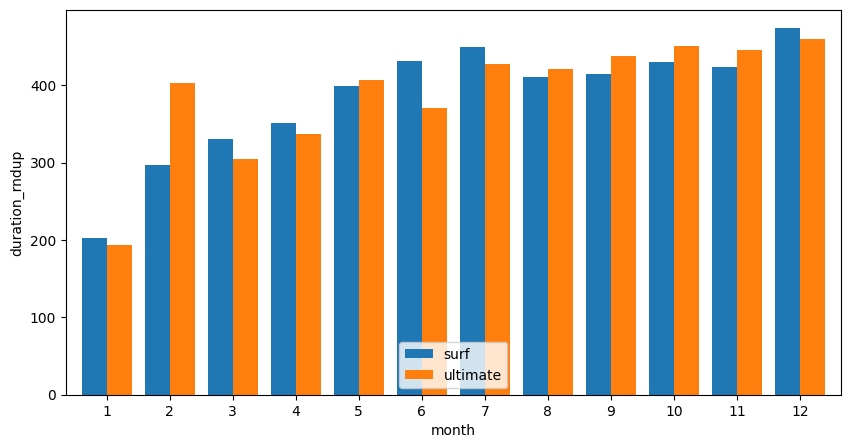

In [106]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. 
# Buatlah sebuah diagram batang untuk memvisualisasikannya.

bar('duration_rndup')


Rata-rata durasi panggilan paket surf konsisten meningkat setiap bulannya.

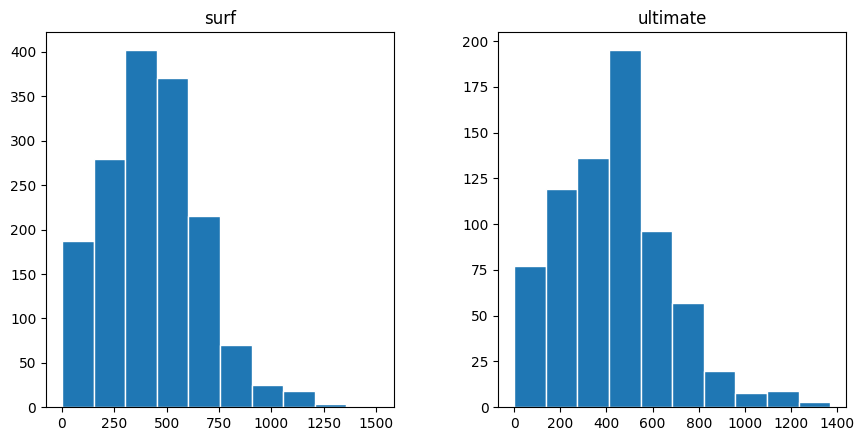

In [107]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
hist('duration_rndup')

Jumlah menit yang dibutuhkan pengguna per bulannya tidak jauh berbeda diantara 2 paket, ini ditunjukkan dari frekuensi pengguna terbanyak di 2 paket pada rentang durasi 0-750 menit. Namun pengguna paket surf lebih banyak daripada paket ultimate.

In [108]:
# Menhitung rata-rata dan varians
avgvar('duration_rndup')

Rata-rata paket surf : 428.7495232040687
Rata-rata paket ultimate : 430.45

Varians paket surf : 54933.334591317485
Varians paket ultimate : 57764.125277777785


Rata-rata durasi panggilan antara 2 paket tidak jauh berbeda.

Median paket surf : 425.0
Median paket ultimate : 424.0


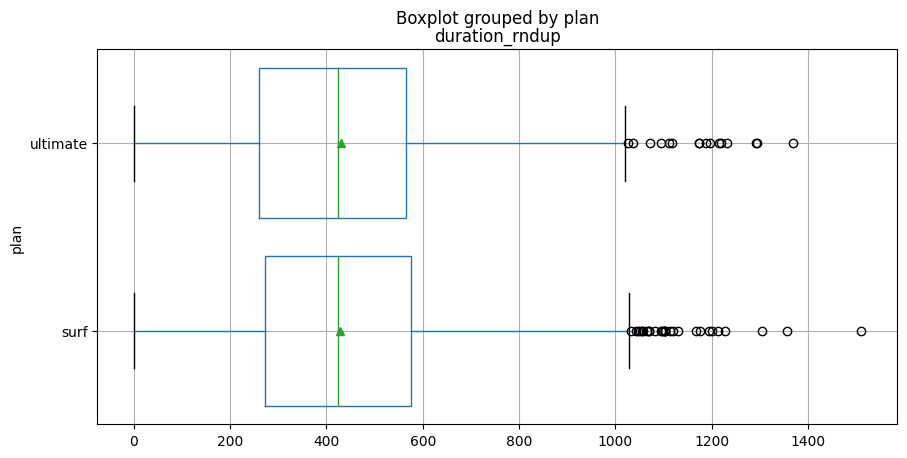

In [109]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
box('duration_rndup')

Nilai median durasi panggilan bulanan paket surf lebih tinggi.

**Kesimpulan durasi panggilan :**

Rata-rata durasi panggilan bulanan kedua paket meningkat setiap bulannya. Paket surf memiliki pertumbuhan yang paling konsisten.

Kebutuhan durasi panggilan pengguna antara 2 paket tidak jauh berbeda, di rentang 0 - 750 menit. Namun paket surf memiliki lebih banyak pengguna.

Rata-rata kebutuhan durasi panggilan pengguna per bulan :

    Surf : 429 Menit.
    Ultimate : 430 Menit
    
Rata-rata kebutuhan durasi panggilan pengguna tidak jauh berbeda. Paket ultimate lebih tinggi 1 menit.

Median durasi panggilan paket :

    Surf : 425 Menit
    Ultimate : 424 Menit

Median durasi panggilan pengguna tidak jauh berbeda. Paket surf lebih tinggi 1 menit. 

Perilaku pengguna kedua paket pada durasi panggilan tidak jauh berbeda.






### Pesan/SMS

plan        surf   ultimate
month                      
1      10.500000  15.500000
2      12.000000  21.571429
3      15.260870  20.250000
4      17.400000  22.047619
5      24.012987  32.103448
6      25.298969  29.340426
7      27.033058  32.830508
8      28.777778  38.478873
9      30.762887  37.895349
10     33.839662  39.443396
11     32.385159  38.606299
12     38.600629  45.006623


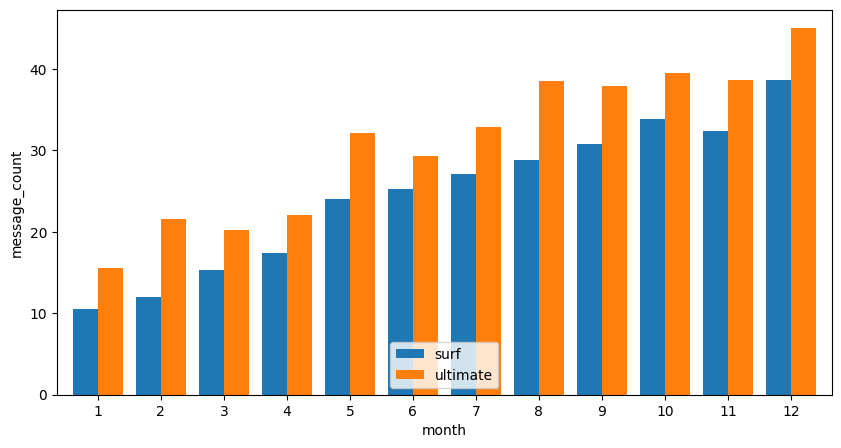

In [110]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
bar('message_count')

Pertumbuhan rata-rata jumlah sms per bulan meningkat dengan konsisten pada kedua paket. Paket ultimate memiliki pemakaian yang lebih tinggi dari paket surf.

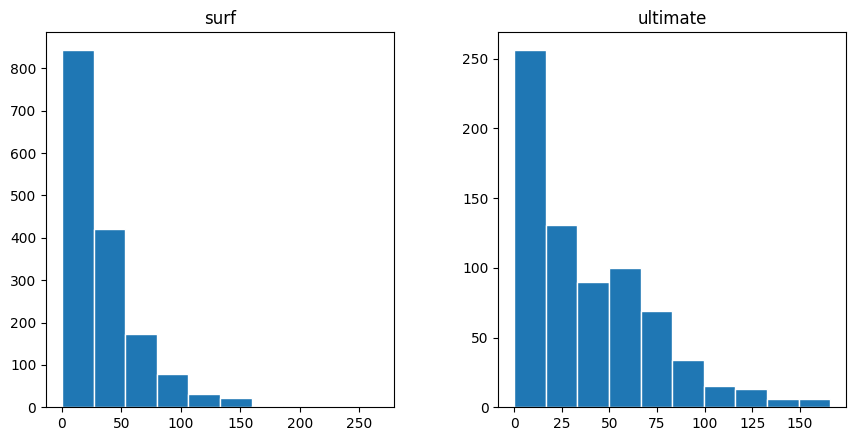

In [111]:
# Bandingkan jumlah SMS yang dibutuhkan pengguna tiap paket per bulannya.
hist('message_count')

Jumlah kebutuhan SMS pengguna paket ultimate lebih tinggi dari paket surf, ini ditunjukkan dari rentang penggunaan SMS terbanyak paket ultimate pada 0-75 sedangkan paket surf berada pada 0-50. Namun paket surf memiliki lebih banyak pengguna daripada paket ultimate.

In [112]:
# Menhitung rata-rata dan varians
avgvar('message_count')

Rata-rata paket surf : 31.15956770502225
Rata-rata paket ultimate : 37.55138888888889

Varians paket surf : 1126.008231726662
Varians paket ultimate : 1207.0779147376545


Rata-rata penggunaan SMS paket ultimate lebih tinggi dari paket surf.

Median paket surf : 24.0
Median paket ultimate : 30.0


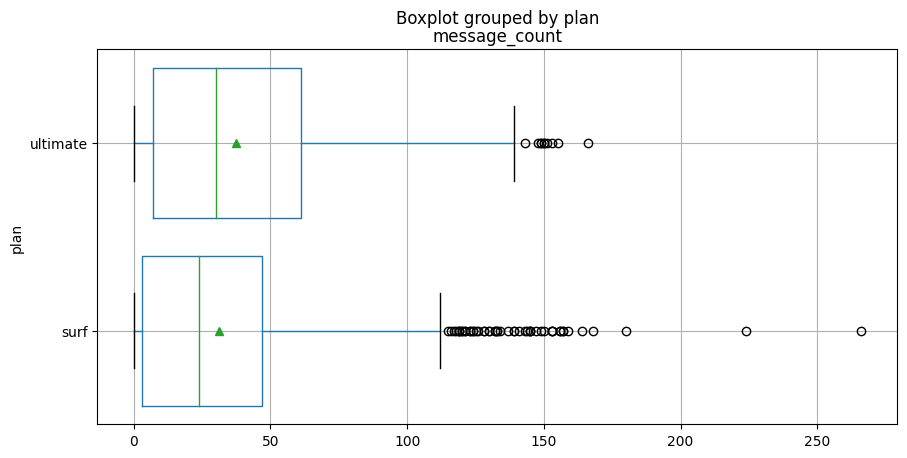

In [113]:
# Grafik boxplot untuk memvisualisasikan distribusi SMS bulanan
box('message_count')

Nilai median paket ultimate lebih tinggi dari paket surf.

**Kesimpulan penggunaan pesan/SMS :**

Rata-rata durasi penggunaan pesan/SMS bulanan kedua paket meningkat setiap bulannya dengan konsisten. Paket ultimate memiliki pemakaian lebih tinggi dari paket surf.

Kebutuhan jumlah pesan/SMS pengguna berbeda, paket ultimate memiliki kebutuhan yang lebih tinggi pada rentang 0-75. Namun paket surf memiliki lebih banyak pengguna.

Rata-rata kebutuhan pesan/SMS pengguna per bulan :

    Surf : 31
    Ultimate : 38
    
Rata-rata kebutuhan paket ultimate lebih tinggi.

Median jumlah pesan/SMS paket :

    Surf : 24
    Ultimate : 30

Median jumlah pesan/SMS pengguna paket ultimate lebih tinggi. 

Perilaku pengguna berbeda, paket ultimate lebih banyak menggunakan pesan/SMS.






### Internet

plan        surf   ultimate
month                      
1       5.000000   7.250000
2      12.222222  17.285714
3      13.565217  18.416667
4      12.220000  16.333333
5      14.116883  16.862069
6      15.484536  15.425532
7      16.876033  16.491525
8      16.882716  17.845070
9      16.690722  17.011628
10     17.409283  17.716981
11     16.431095  17.118110
12     18.238994  18.397351


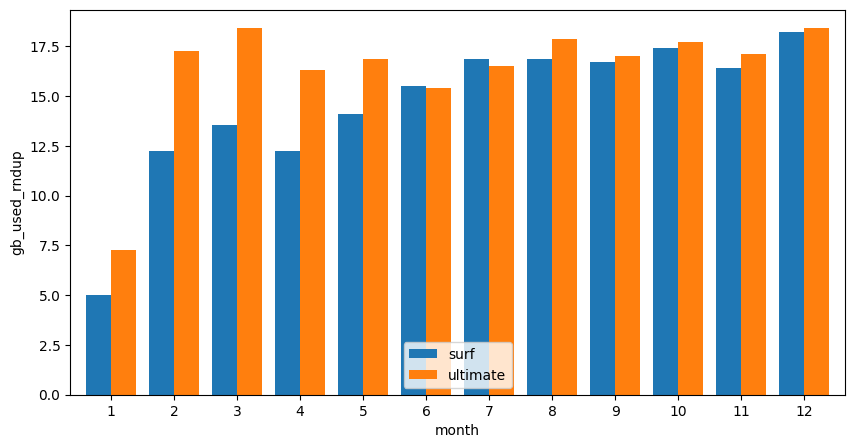

In [114]:
# Bandingkan pemakaian internet yang digunakan pengguna tiap paket per bulannya
bar('gb_used_rndup')

Pertumbuhan rata-rata pemakaian internet per bulan meningkat pada kedua paket. Paket surf memiliki pertumbuhan yang lebih konsisten.

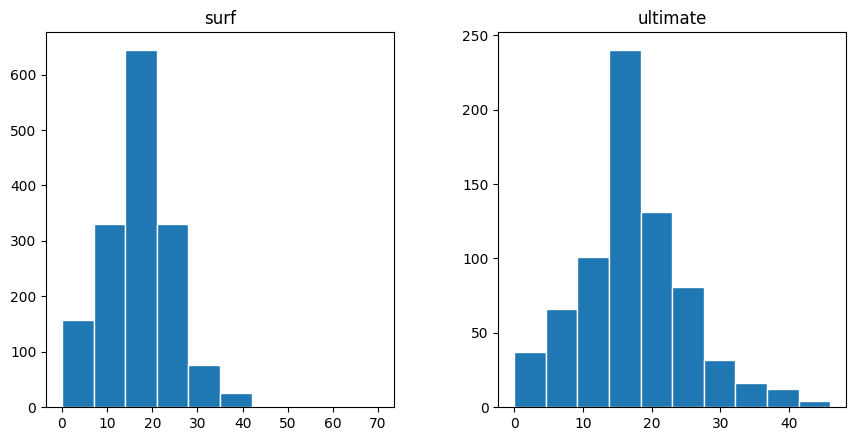

In [115]:
# Bandingkan jumlah internet yang dibutuhkan pengguna tiap paket per bulannya.
hist('gb_used_rndup')

Jumlah kebutuhan internet pengguna di kedua paket tidak jauh berbeda berada di rentang 5 - 28 gb. Namun paket surf memiliki lebih banyak pengguna.

In [116]:
# Menhitung rata-rata dan varians
avgvar('gb_used_rndup')

Rata-rata paket surf : 16.670692943420217
Rata-rata paket ultimate : 17.306944444444444

Varians paket surf : 61.54444942447023
Varians paket ultimate : 58.748840663580246


Rata-rata penggunaan internet tidak jauh berbeda antara kedua paket.

Median paket surf : 17.0
Median paket ultimate : 17.0


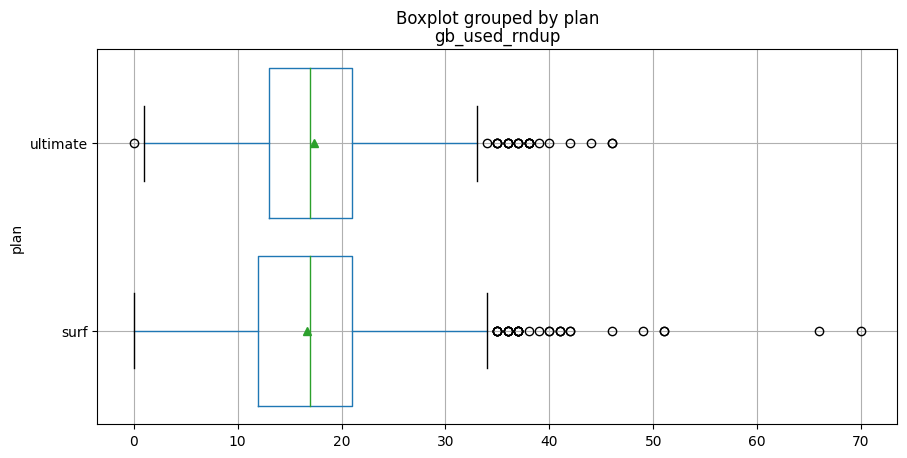

In [117]:
# Grafik boxplot untuk memvisualisasikan distribusi penggunaan internet bulanan
box('gb_used_rndup')

Nilai median kedua paket sama.

**Kesimpulan penggunaan Internet :**

Rata-rata penggunaan internet bulanan kedua paket meningkat setiap bulannya. Paket surf memiliki pertumbuhan yang lebih konsisten.

Kebutuhan internet kedua paket tidak jauh berbeda, di rentang 5-28gb. Namun paket surf memiliki lebih banyak pengguna.

Rata-rata kebutuhan internet pengguna per bulan :

    Surf : 16.7 Gb
    Ultimate : 17 Gb
    
Rata-rata kebutuhan pengguna kedua paket tidak jauh berbeda.

Median penggunaan internet paket :

    Surf : 17 Gb
    Ultimate : 17 Gb

Median penggunaan internet kedua paket sama. 

Perilaku pengguna sama dalam penggunaan internet di kedua paket.






## Pendapatan

plan        surf   ultimate
month                      
1      20.000000  70.000000
2      34.396667  70.000000
3      45.941304  74.666667
4      40.710600  73.000000
5      47.628182  70.724138
6      49.276289  71.638298
7      62.674050  71.898305
8      63.931173  73.748310
9      58.271495  72.029884
10     67.601139  72.813774
11     60.808127  72.343071
12     75.528648  75.516556


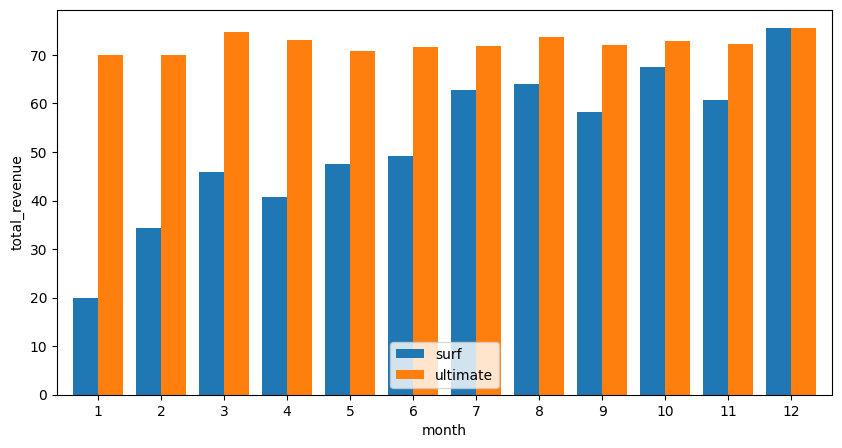

In [118]:
# Bandingkan rata-rata pendapatan dari pengguna tiap paket per bulannya
bar('total_revenue')

Pertumbuhan rata-rata pendapatan paket surf terus meningkat tiap bulannya sedangkan paket ultimate cenderung
lebih stabil.

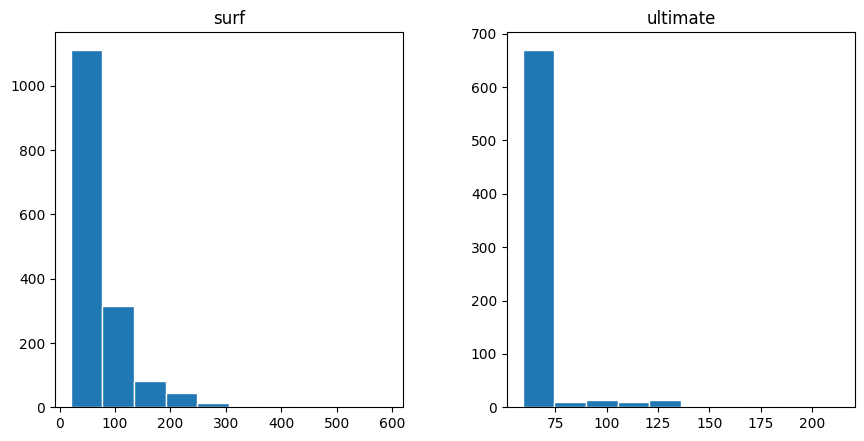

In [119]:
# Bandingkan jumlah pendapatan yang didapat dari pengguna tiap paket per bulannya.
hist('total_revenue')

Rentang pendapatan yang diperoleh dari paket surf sangat bervariasi dari rentang 20 - 120 USD sedangkan paket ultimate cenderung lebih stabil di rentang 70 - 75 usd. Namun paket surf memiliki pengguna yang lebih tinggi.

In [120]:
# Menghitung rata-rata dan varians
avgvar('total_revenue')

Rata-rata paket surf : 62.544361093452004
Rata-rata paket ultimate : 73.05351388888889

Varians paket surf : 3350.59068841888
Varians paket ultimate : 183.52414362480707


Rata-rata pendapatan dari kedua paket berbeda.

Median paket surf : 41.47
Median paket ultimate : 70.0


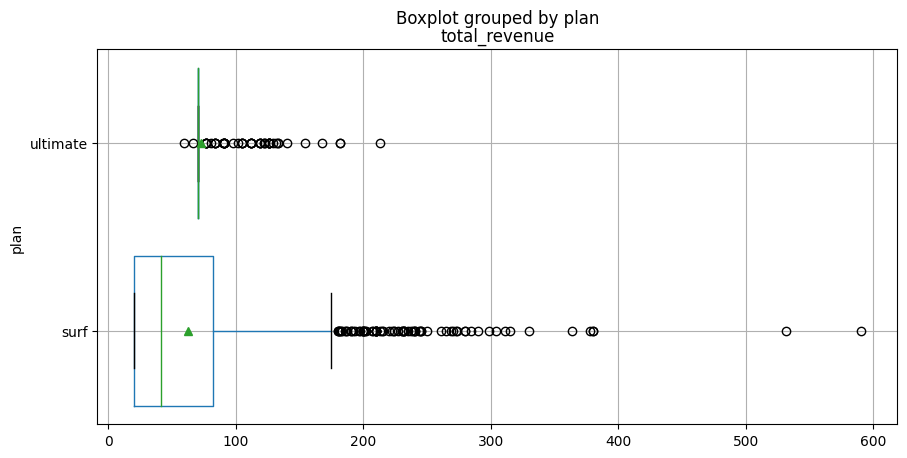

In [121]:
# Grafik boxplot untuk memvisualisasikan distribusi pendapatan bulanan
box('total_revenue')

Nilai median kedua paket berbeda jauh. Median paket ultimate lebih tinggi.

**Kesimpulan pendapatan dari kedua paket :**

Pertumbuhan rata-rata pendapatan paket surf terus meningkat tiap bulannya sedangkan paket ultimate cenderung lebih stabil.

Rentang pendapatan yang diperoleh dari paket surf 20 - 120 USD sedangkan paket ultimate cenderung lebih stabil di rentang 70 - 75 usd. Namun paket surf memiliki pengguna yang lebih tinggi.

Rata-rata pendapatan dari pengguna per bulan :

    Surf : 63 USD
    Ultimate : 73 USD
    
Rata-rata pendapatan dari pengguna paket ultimate lebih tinggi dari paket surf.

Median pendapatan dari pengguna paket :

    Surf : 41 USD
    Ultimate : 70 USD

Median pendapatan dari paket ultimate lebih tinggi. 

Pendapatan rata-rata pengguna kedua paket berbeda. 







## Menguji Hipotesis Statistik

1. Pengujian hipotesis pendapatan rata-rata dari pengguna paket Ultimate dan Surf berbeda.

   H0 = Pendapatan rata-rata pengguna paket surf sama dengan paket ultimate.
   
   H1 = Pendapatan rata-rata pengguna paket surf berbeda dengan paket ultimate.

In [122]:
# Uji hipotesisnya

revenue = df.pivot_table(index='month', columns='plan', values='total_revenue')
result = st.ttest_ind(revenue['surf'], revenue['ultimate'], equal_var=False)

alpha = 0.05

print('p-value:', result.pvalue)

if result.pvalue < alpha : 
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")


p-value: 0.0009551062946880569
Kita menolak hipotesis nol


Pendapatan rata-rata dari pengguna paket Ultimate dan Surf berbeda.

2. Pengujian hipotesis bahwa pendapatan pengguna pada area MSA (Metropolitan Statistical Area) NY-NJ-PA berbeda dengan wilayah lain.

   H0 = Pendapatan pengguna wilayah NY-NJ-PA sama dengan wilayah lain.
   
   H1 = Pendapatan pengguna wilayah NY-NJ-PA berbeda dengan wilayah lain.

In [123]:
# Uji hipotesisnya

revenue1 = df.query('msa == "NY-NJ-PA"').pivot_table(index='month', values='total_revenue')
revenue2 = df.query('msa != "NY-NJ-PA"').pivot_table(index='month', values='total_revenue')

alpha = 0.05

result = st.ttest_ind(revenue1['total_revenue'], revenue2['total_revenue'], equal_var=False)

print('p-value:', result.pvalue)

if result.pvalue < alpha : 
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")



p-value: 0.13970140402664824
Kita tidak dapat menolak hipotesis nol


Pendapatan pengguna pada area NY-NJ-PA sama dengan wilayah lain.

## Kesimpulan Umum



Pada data sampel Megaline periode tahun 2018, terdapat  4 data yaitu :

1. **plans** yang berisi tentang informasi paket.
2. **users** yang berisi informasi tarkait pengguna paket.
3. **calls** yang berisi informasi penggunaan panggilan.
4. **messages** yang berisi informasi penggunaan pesan/SMS.
5. **internet** yang berisi informasi penggunaan internet.

Perbaikan yang dilakukan pada data :

1. Data **users** :
 
   a. Nilai yang hilang pada kolom `churn_date` diganti dengan tanggal `2018-12-31`.
   Kemungkinan nilai yang hilang pada kolom churn_date karena paket masih aktif pada saat data dibuat.     Nilai ini diganti dengan tanggal akhir periode data. 
   
   b. Perubahan tipe data kolom `churn_date` menjadi datetime.
   
   c. Perubahan tipe data kolom `reg_date` menjadi datetime.


2. Data **calls** :

   a. Perubahan tipe data kolom `call_date` menjadi datetime.

   b. Filter data **calls** dengan duration lebih dari 0 ke data baru **calls_filtered**. Data ini di filter          karena mempengaruhi nilai rata - rata duration dari 6.75 menit menjadi 8.38 menit. Data durasi 0        ini berasal dari data panggilan yang tidak terjawab.


3. Data **messages** :

   a. Perubahan tipe data kolom `message_date` menjadi datetime.

4. Data **internet** :

   a. Perubahan tipe data kolom `session_date` menjadi datetime.

Setelah melakukan perbaikan pada data juga dilakukan penambahan informasi untuk mempermudah analisa :

1. Data **plans** :

   a. Menambah kolom `gb_per_month_included`. Kuota internet tiap paket dalam gigabita.

2. Data **users** :

   a. Menambah kolom `msa`. Informasi kode area MSA.

3. Data **calls_filtered** :

   a. Menambah informasi bulan pemakaian panggilan, kolom `month`.

   b. Menambah informasi pembulatan pemakaian, kolom `duration_rndup`. Karena Megaline membulatkan keatas       setiap menit durasi panggilan.
   
   c. Menambah informasi dari data users ke `calls_filtered`.
   
   d. Menambah informasi status paket kolom `plan_status`, karena terdapat pemakaian diatas batas bulan       aktif paket churn_date.

4. Data **messages** :

   a. Menambah informasi bulan pemakaian pesan/SMS kolom `month`.

   b. Menambah informasi dari data users ke messages.
   
   c. Menambah informasi status paket kolom `plan_status`, karena terdapat pemakaian diatas batas bulan    aktif paket churn_date.

5. Data **internet** :

   a. Menambah informasi bulan pemakaian, kolom `month`.
   
   b. Menambah informasi dari data users ke internet.
   
   c. Menambah informasi status paket kolom `plan_status`, karena terdapat pemakaian diatas batas bulan    aktif paket churn_date.

Informasi mengenai syarat dan kondisi paket prabayar Megaline :

1. **Surf**

       Biaya bulanan: $20
500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data 
Setelah melebihi batas paket, akan dikenakan:
1 menit: 3 sen
1 SMS: 3 sen
1 GB data: $10

2. **Ultimate**

       Biaya bulanan: $70
3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
Setelah melebihi batas paket, akan dikenakan:
1 menit: 1 sen
1 SMS: 1 sen
1 GB data: $7

**Catatan :** Megaline membulatkan detik ke menit, serta membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.

Informasi yang didapatkan dari data **calls_filtered, messages dan internet** terdapat pemakaian diatas `churn_date`. Pemakaian dibawah `churn_date` akan dilabeli *active* pada kolom `plan_status`, sebaliknya akan dilabeli *nonactive*.

Untuk menghitung pendapatan tahun 2018 atas kedua paket ini akan mengikuti syarat dan kondisi dari paket Megaline serta untuk data penggunaan dengan plan_status *nonactive* akan dihitung sebagai kelebihan pemakaian.

untuk mendapatkan nilai pendapatan tahun 2018 dilakukan :

1. Agregasi data jumlah panggilan dari **calls_filtered** menjadi data **call_count**.
2. Agregasi data durasi panggilan dari **calls_filtered** menjadi data **call_duration**.
3. Agregasi data jumlah pesan dari **messages** menjadi data **message_count**.
4. Agregasi data pemakaian internet dari **internet** menjadi data **internet_usage**.
5. Menggabungkan data dari **call_count**, **call_duration**, **message_count** dan **internet_usage** dalam satu data frame **df**.
6. Menambahkan informasi dari data **users** ke **df**.
7. Menambahkan informasi dari data **plans** ke **df**.
8. Menghitung kelebihan durasi panggilan dalam menit dengan menambah kolom `over_minutes`.
9. Menghitung kelebihan pesan/sms dengan menambah kolom `over_messages`.
10. Menghitung kelebihan gb internet dengan menambah kolom `over_gb`.
11. Menghitung pendapatan biaya bulanan dengan menambah kolom `subs_revenue`.
12. Menghitung pendapatan biaya kelebihan durasi panggilan dengan menambah kolom `over_minutes_revenue`.
13. Menghitung pendapatan biaya kelebihan pesan sms dengan menambah kolom `over_messages_revenue`.
14. Menghitung pendapatan biaya kelebihan gn internet dengan menambah kolom `over_gb_revenue`.
15. Menghitung total pendapatan dengan menambah kolom `total_revenue`.

Setelah menggabungkan data menjadi satu data frame **df**, diketahui perilaku pengguna yaitu :

1. Durasi panggilan.

Rata-rata durasi panggilan bulanan kedua paket meningkat setiap bulannya. Paket surf memiliki pertumbuhan yang paling konsisten.

Kebutuhan durasi panggilan pengguna antara 2 paket tidak jauh berbeda, di rentang 0 - 750 menit. Namun paket surf memiliki lebih banyak pengguna.

Rata-rata kebutuhan durasi panggilan pengguna per bulan :

    Surf : 429 Menit.
    Ultimate : 430 Menit
    
Rata-rata kebutuhan durasi panggilan pengguna tidak jauh berbeda. Paket ultimate lebih tinggi 1 menit.

Median durasi panggilan paket :

    Surf : 425 Menit
    Ultimate : 424 Menit

Median durasi panggilan pengguna tidak jauh berbeda. Paket surf lebih tinggi 1 menit. 

Perilaku pengguna kedua paket pada durasi panggilan tidak jauh berbeda.

2. Pesan / SMS.

Rata-rata durasi penggunaan pesan/SMS bulanan kedua paket meningkat setiap bulannya dengan konsisten. Paket ultimate memiliki pemakaian lebih tinggi dari paket surf.

Kebutuhan jumlah pesan/SMS pengguna berbeda, paket ultimate memiliki kebutuhan yang lebih tinggi pada rentang 0-75. Namun paket surf memiliki lebih banyak pengguna.

Rata-rata kebutuhan pesan/SMS pengguna per bulan :

    Surf : 31
    Ultimate : 38
    
Rata-rata kebutuhan paket ultimate lebih tinggi.

Median jumlah pesan/SMS paket :

    Surf : 24
    Ultimate : 30

Median jumlah pesan/SMS pengguna paket ultimate lebih tinggi. 

Perilaku pengguna berbeda, paket ultimate lebih banyak menggunakan pesan/SMS.

3. Internet.

Rata-rata penggunaan internet bulanan kedua paket meningkat setiap bulannya. Paket surf memiliki pertumbuhan yang lebih konsisten.

Kebutuhan internet kedua paket tidak jauh berbeda, di rentang 5-28gb. Namun paket surf memiliki lebih banyak pengguna.

Rata-rata kebutuhan internet pengguna per bulan :

Surf : 16.7 Gb
Ultimate : 17 Gb

Rata-rata kebutuhan pengguna kedua paket tidak jauh berbeda.

Median penggunaan internet paket :

Surf : 17 Gb
Ultimate : 17 Gb

Median penggunaan internet kedua paket sama.

Perilaku pengguna sama dalam penggunaan internet di kedua paket.

4. Pendapatan.

Pertumbuhan rata-rata pendapatan paket surf terus meningkat tiap bulannya sedangkan paket ultimate cenderung lebih stabil.

Rentang pendapatan yang diperoleh dari paket surf 20 - 120 USD sedangkan paket ultimate cenderung lebih stabil di rentang 70 - 75 usd. Namun paket surf memiliki pengguna yang lebih tinggi.

Rata-rata pendapatan dari pengguna per bulan :

Surf : 63 USD
Ultimate : 73 USD

Rata-rata pendapatan dari pengguna paket ultimate lebih tinggi dari paket surf.

Median pendapatan dari pengguna paket :

Surf : 41 USD
Ultimate : 70 USD

Median pendapatan dari paket ultimate lebih tinggi.

Pendapatan rata-rata pengguna kedua paket berbeda.

Setelah dilakukan pengujian hipotesis statistik didapatkan :

1. Pendapatan rata-rata dari pengguna paket ultimate dan surf berbeda.

2. Pendapatan rata-rata pengguna wilayah NY-NJ-PA sama dengan wilayah lainnya.


**Paket prabayar manakah yang lebih menguntungkan ?**

Jika dilihat dari pertumbuhan total pendapatan dalam tahun 2018 :

plan       surf  ultimate
month                    
1         40.00    280.00
2        309.57    490.00
3       1056.65    896.00
4       2035.53   1533.00
5       3667.37   2051.00
6       4779.80   3367.00
7       7583.56   4242.00
8      10356.85   5236.13
9      11304.67   6194.57
10     16021.47   7718.26
11     17208.70   9187.57
12     24018.11  11403.00


Text(0, 0.5, 'total_revenue')

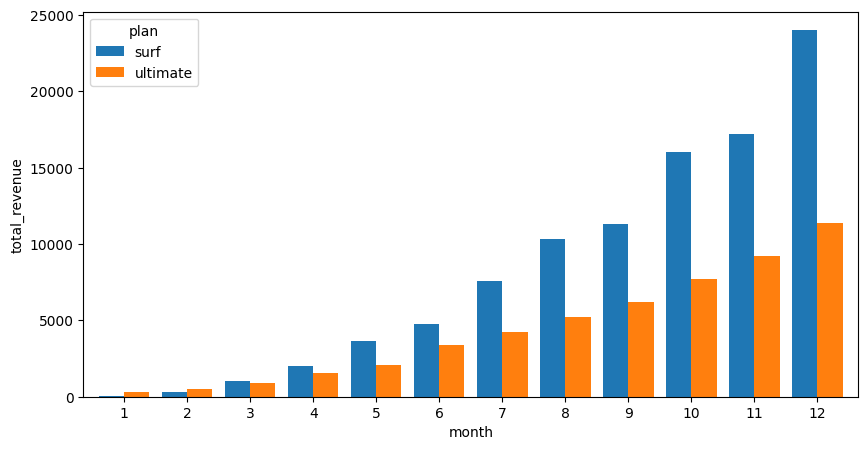

In [124]:
table=df.pivot_table(index='month', columns='plan', values='total_revenue', aggfunc='sum')
print(table)
table.plot(kind='bar', figsize=(10,5), width=0.8, rot=0)
plt.ylabel('total_revenue')

Jelas paket Surf memiliki pertumbuhan yang pesat dan total pendapatan yang lebih tinggi dari paket ultimate di tahun 2018.

Jika dilihat dari komponen pendapatan kedua paketnya :

In [125]:
df.pivot_table(index='plan', values=['subs_revenue', 'over_minutes_revenue', 'over_gb_revenue', 'over_messages_revenue', 'total_revenue'],
              aggfunc='sum')

,over_gb_revenue,over_messages_revenue,over_minutes_revenue,subs_revenue,total_revenue
plan,,,,,
surf,63880.0,352.80,3189.48,30960,98382.28
ultimate,2982.0,2.76,53.77,49560,52598.53


Walaupun pendapatan biaya bulanan paket Surf lebih rendah dari paket Ultimate, Paket Surf memperoleh pendapatan terbesar dari biaya kelebihan penggunaan internet dan panggilan. Hal ini diketahui dari perilaku pengguna paket Surf yang memiliki kebutuhan yang sama di kedua penggunaan ini dengan pengguna paket Ultimate, sedangkan kuota pada paket Surf lebih kecil dari paket Ultimate.

In [126]:
usersurf = len(df.query('plan == "surf"')['user_id'].unique())
usersulti = len(df.query('plan == "ultimate"')['user_id'].unique())

print('Total jumlah pengguna paket Surf :', usersurf)
print()
print('Total jumlah pengguna paket Ultimate :', usersulti)

Total jumlah pengguna paket Surf : 333

Total jumlah pengguna paket Ultimate : 157


Dan di tahun 2018, paket Surf memiliki lebih banyak pengguna dari paket Ultimate.